In [30]:
import os
import torch
import torchvision
import torch.nn as nn
import numpy as np
import pandas as pd
import torch.nn.functional as F
from torchvision.datasets.utils import download_url
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import torchvision.transforms as tt
from torch.utils.data import random_split
from torchvision.utils import make_grid
import matplotlib 
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

matplotlib.rcParams['figure.facecolor'] = '#ffffff'

In [31]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Basic Preprocessing of the dataframe

In [32]:
df=pd.read_csv('/content/drive/MyDrive/Barifflo Labs/Data- openweatherchennai.csv')

In [33]:
year=[]
date=[]
month=[]
hour=[]

for i in df.index:
 print(len(df)-i)
 x= df.dt_iso[i]
 y=x[0:4]
 d=x[8:10]
 m=x[5:7]
 h=x[11:13]
 year.append(y)
 date.append(d)
 month.append(m)
 hour.append(h)

df['year']=year
df['date']=date
df['month']=month
df['hour']=hour

Streaming output truncated to the last 5000 lines.
5000
4999
4998
4997
4996
4995
4994
4993
4992
4991
4990
4989
4988
4987
4986
4985
4984
4983
4982
4981
4980
4979
4978
4977
4976
4975
4974
4973
4972
4971
4970
4969
4968
4967
4966
4965
4964
4963
4962
4961
4960
4959
4958
4957
4956
4955
4954
4953
4952
4951
4950
4949
4948
4947
4946
4945
4944
4943
4942
4941
4940
4939
4938
4937
4936
4935
4934
4933
4932
4931
4930
4929
4928
4927
4926
4925
4924
4923
4922
4921
4920
4919
4918
4917
4916
4915
4914
4913
4912
4911
4910
4909
4908
4907
4906
4905
4904
4903
4902
4901
4900
4899
4898
4897
4896
4895
4894
4893
4892
4891
4890
4889
4888
4887
4886
4885
4884
4883
4882
4881
4880
4879
4878
4877
4876
4875
4874
4873
4872
4871
4870
4869
4868
4867
4866
4865
4864
4863
4862
4861
4860
4859
4858
4857
4856
4855
4854
4853
4852
4851
4850
4849
4848
4847
4846
4845
4844
4843
4842
4841
4840
4839
4838
4837
4836
4835
4834
4833
4832
4831
4830
4829
4828
4827
4826
4825
4824
4823
4822
4821
4820
4819
4818
4817
4816
4815
4814
4813
4812
4811

In [34]:
# dt_iso values in format: 1979-01-01 00:00:00 +0000 UTC

df.dt_iso = df.dt_iso.astype(str) 
df['dt_iso'] = df.dt_iso.str[:-3] 
df['dt_iso'] = pd.to_datetime(df['dt_iso'], utc=True) 
 
# Setting the Date as index
df = df.set_index("dt_iso")
df

dt  timezone city_name       lat  \
dt_iso                                                                
1979-01-01 00:00:00+00:00   283996800     19800   Chennai  13.08268   
1979-01-01 01:00:00+00:00   284000400     19800   Chennai  13.08268   
1979-01-01 02:00:00+00:00   284004000     19800   Chennai  13.08268   
1979-01-01 03:00:00+00:00   284007600     19800   Chennai  13.08268   
1979-01-01 04:00:00+00:00   284011200     19800   Chennai  13.08268   
...                               ...       ...       ...       ...   
2022-03-22 19:00:00+00:00  1647975600     19800   Chennai  13.08268   
2022-03-22 20:00:00+00:00  1647979200     19800   Chennai  13.08268   
2022-03-22 21:00:00+00:00  1647982800     19800   Chennai  13.08268   
2022-03-22 22:00:00+00:00  1647986400     19800   Chennai  13.08268   
2022-03-22 23:00:00+00:00  1647990000     19800   Chennai  13.08268   

                                 lon   temp  visibility  dew_point  \
dt_iso                                                               
1979-01-01 00:00:00+00:00  80.270718  23.70      2000.0      21.59   
1979-01-01 01:00:00+00:00  80.270718  23.65      2000.0      21.54   
1979-01-01 02:00:00+00:00  80.270718  23.25         NaN      20.97   
1979-01-01 03:00:00+00:00  80.270718  25.63     10000.0      23.49   
1979-01-01 04:00:00+00:00  80.270718  25.70     10000.0      23.56   
...                              ...    ...         ...        ...   
2022-03-22 19:00:00+00:00  80.270718  28.42      5000.0      25.85   
2022-03-22 20:00:00+00:00  80.270718  28.27      4000.0      26.09   
2022-03-22 21:00:00+00:00  80.270718  28.18      3000.0      26.38   
2022-03-22 22:00:00+00:00  80.270718  28.18      3000.0      26.38   
2022-03-22 23:00:00+00:00  80.270718  28.04      3000.0      26.62   

                           feels_like  temp_min  ...  snow_3h  clouds_all  \
dt_iso                                           ...                        
1979-01-01 00:00:00+00:00       24.42     21.04  ...      NaN          20   
1979-01-01 01:00:00+00:00       24.37     21.04  ...      NaN          20   
1979-01-01 02:00:00+00:00       23.90     23.25  ...      NaN          18   
1979-01-01 03:00:00+00:00       26.55     23.04  ...      NaN          20   
1979-01-01 04:00:00+00:00       26.62     23.04  ...      NaN          20   
...                               ...       ...  ...      ...         ...   
2022-03-22 19:00:00+00:00       34.30     27.83  ...      NaN          40   
2022-03-22 20:00:00+00:00       34.23     27.55  ...      NaN          75   
2022-03-22 21:00:00+00:00       34.32     27.55  ...      NaN          75   
2022-03-22 22:00:00+00:00       34.32     27.55  ...      NaN          75   
2022-03-22 23:00:00+00:00       34.24     27.60  ...      NaN          40   

                           weather_id  weather_main  weather_description  \
dt_iso                                                                     
1979-01-01 00:00:00+00:00         721          Haze                 haze   
1979-01-01 01:00:00+00:00         721          Haze                 haze   
1979-01-01 02:00:00+00:00         801        Clouds           few clouds   
1979-01-01 03:00:00+00:00         801        Clouds           few clouds   
1979-01-01 04:00:00+00:00         801        Clouds           few clouds   
...                               ...           ...                  ...   
2022-03-22 19:00:00+00:00         701          Mist                 mist   
2022-03-22 20:00:00+00:00         701          Mist                 mist   
2022-03-22 21:00:00+00:00         701          Mist                 mist   
2022-03-22 22:00:00+00:00         701          Mist                 mist   
2022-03-22 23:00:00+00:00         701          Mist                 mist   

                           weather_icon  year  date  month  hour  
dt_iso                                                            
1979-01-01 00:00:00+00:00           50n  1979    01     01    00  
1979-01-

In [35]:
for i in df.columns:
  print(i)
  print(df[i].unique(),'\n')

dt
[ 283996800  284000400  284004000 ... 1647982800 1647986400 1647990000] 

timezone
[19800] 

city_name
['Chennai'] 

lat
[13.08268] 

lon
[80.270718] 

temp
[23.7  23.65 23.25 ... 37.58 36.58 37.34] 

visibility
[ 2000.    nan 10000.  4000.  6000.  1000.  3100.   500.  7000.  5000.
   200.  3000.    50.  2100.  4700.  9000.  3600.   600.   700.   100.
  3300.  3700.  1500.  8000.  1200.  1600.  2500.  1800.  1400.  1250.
  4500.   300.   400.  9900.  6008.  3500.   800.  4800.  1300.   900.
  4999.  3200.  1700.  7800.  5080.  8277.  6999.   150.  2800.  2200.
  9656.  2400.  2900.  1100.  3218.   805.  4828.  1609.  8046.  6437.
  2600.  9990.  3800.  2700.  8800.  1900.  3400.  1640.  2300.  5500.
   550.   450.  4200.   350.  4100.  9999.   250.    49.   750.  4900.
   650.] 

dew_point
[21.59 21.54 20.97 ...  4.79  3.63  6.61] 

feels_like
[24.42 24.37 23.9  ... 43.58 44.34 43.84] 

temp_min
[21.04 23.25 23.04 ... 37.79 39.44 41.01] 

temp_max
[24.89 24.87 23.25 ... 39.59 38.33 

In [36]:
df.columns

Index(['dt', 'timezone', 'city_name', 'lat', 'lon', 'temp', 'visibility',
       'dew_point', 'feels_like', 'temp_min', 'temp_max', 'pressure',
       'sea_level', 'grnd_level', 'humidity', 'wind_speed', 'wind_deg',
       'wind_gust', 'rain_1h', 'rain_3h', 'snow_1h', 'snow_3h', 'clouds_all',
       'weather_id', 'weather_main', 'weather_description', 'weather_icon',
       'year', 'date', 'month', 'hour'],
      dtype='object')

In [37]:
df.drop(['dt', 'timezone', 'city_name', 'lat', 'lon', 'sea_level', 'grnd_level', 'snow_1h', 'snow_3h'], axis=1, inplace=True) 

In [38]:
df.drop(['weather_icon'], axis=1, inplace=True)  #cuz weather_icon and weather_description give the same info, so having both those columns is redundant

In [39]:
df.to_csv('/content/drive/MyDrive/Barifflo Labs/updated_df_1.csv',index=True) 

# Data Exploration



*   Data is based at Chennai
*   weather_main, weather_description, weather_icon are the textual columns





In [40]:
df= pd.read_csv('/content/drive/MyDrive/Barifflo Labs/updated_df_1.csv')

In [41]:
df

dt_iso   temp  visibility  dew_point  feels_like  \
0       1979-01-01 00:00:00+00:00  23.70      2000.0      21.59       24.42   
1       1979-01-01 01:00:00+00:00  23.65      2000.0      21.54       24.37   
2       1979-01-01 02:00:00+00:00  23.25         NaN      20.97       23.90   
3       1979-01-01 03:00:00+00:00  25.63     10000.0      23.49       26.55   
4       1979-01-01 04:00:00+00:00  25.70     10000.0      23.56       26.62   
...                           ...    ...         ...        ...         ...   
388230  2022-03-22 19:00:00+00:00  28.42      5000.0      25.85       34.30   
388231  2022-03-22 20:00:00+00:00  28.27      4000.0      26.09       34.23   
388232  2022-03-22 21:00:00+00:00  28.18      3000.0      26.38       34.32   
388233  2022-03-22 22:00:00+00:00  28.18      3000.0      26.38       34.32   
388234  2022-03-22 23:00:00+00:00  28.04      3000.0      26.62       34.24   

        temp_min  temp_max  pressure  humidity  wind_speed  ...  rain_1h  \
0          21.04     24.89      1014        88        0.50  ...      NaN   
1          21.04     24.87      1014        88        0.50  ...      NaN   
2          23.25     23.25      1015        87        2.84  ...      NaN   
3          23.04     26.58      1016        88        1.00  ...      NaN   
4          23.04     26.51      1016        88        1.00  ...      NaN   
...          ...       ...       ...       ...         ...  ...      ...   
388230     27.83     30.01      1009        86        2.06  ...      NaN   
388231     27.55     30.01      1009        88        3.09  ...      NaN   
388232     27.55     30.01      1008        90        2.57  ...      NaN   
388233     27.55     30.01      1008        90        1.54  ...      NaN   
388234     27.60     29.01      1008        92        0.45  ...      NaN   

        rain_3h  clouds_all  weather_id  weather_main  weather_description  \
0           NaN          20         721          Haze                 haze   
1           NaN          20         721          Haze                 haze   
2           NaN          18         801        Clouds           few clouds   
3           NaN          20         801        Clouds           few clouds   
4           NaN          20         801        Clouds           few clouds   
...         ...         ...         ...           ...                  ...   
388230      NaN          40         701          Mist                 mist   
388231      NaN          75         701          Mist                 mist   
388232      NaN          75         701          Mist                 mist   
388233      NaN          75         701          Mist                 mist   
388234      NaN          40         701          Mist                 mist   

        year date  month  hour  
0       1979    1      1     0  
1       1979    1      1     1  
2       1979    1      1     2  
3       1979    1      1     3  
4       1979    1      1     4  
...      ...  ...    ...   ...  
388230  2022   22      3    19  
388231  2022   22      3    20  
388232  2022   22      3    21  
388233  2022   22      3    22  
388234  2022   22      3    23  

[388235 rows x 22 columns]

In [42]:
df=df.set_index('dt_iso')

In [43]:
df

temp  visibility  dew_point  feels_like  temp_min  \
dt_iso                                                                          
1979-01-01 00:00:00+00:00  23.70      2000.0      21.59       24.42     21.04   
1979-01-01 01:00:00+00:00  23.65      2000.0      21.54       24.37     21.04   
1979-01-01 02:00:00+00:00  23.25         NaN      20.97       23.90     23.25   
1979-01-01 03:00:00+00:00  25.63     10000.0      23.49       26.55     23.04   
1979-01-01 04:00:00+00:00  25.70     10000.0      23.56       26.62     23.04   
...                          ...         ...        ...         ...       ...   
2022-03-22 19:00:00+00:00  28.42      5000.0      25.85       34.30     27.83   
2022-03-22 20:00:00+00:00  28.27      4000.0      26.09       34.23     27.55   
2022-03-22 21:00:00+00:00  28.18      3000.0      26.38       34.32     27.55   
2022-03-22 22:00:00+00:00  28.18      3000.0      26.38       34.32     27.55   
2022-03-22 23:00:00+00:00  28.04      3000.0      26.62       34.24     27.60   

                           temp_max  pressure  humidity  wind_speed  wind_deg  \
dt_iso                                                                          
1979-01-01 00:00:00+00:00     24.89      1014        88        0.50       360   
1979-01-01 01:00:00+00:00     24.87      1014        88        0.50       360   
1979-01-01 02:00:00+00:00     23.25      1015        87        2.84        28   
1979-01-01 03:00:00+00:00     26.58      1016        88        1.00       320   
1979-01-01 04:00:00+00:00     26.51      1016        88        1.00       320   
...                             ...       ...       ...         ...       ...   
2022-03-22 19:00:00+00:00     30.01      1009        86        2.06       170   
2022-03-22 20:00:00+00:00     30.01      1009        88        3.09       170   
2022-03-22 21:00:00+00:00     30.01      1008        90        2.57       190   
2022-03-22 22:00:00+00:00     30.01      1008        90        1.54       210   
2022-03-22 23:00:00+00:00     29.01      1008        92        0.45       200   

                           ...  rain_1h  rain_3h  clouds_all  weather_id  \
dt_iso                     ...                                             
1979-01-01 00:00:00+00:00  ...      NaN      NaN          20         721   
1979-01-01 01:00:00+00:00  ...      NaN      NaN          20         721   
1979-01-01 02:00:00+00:00  ...      NaN      NaN          18         801   
1979-01-01 03:00:00+00:00  ...      NaN      NaN          20         801   
1979-01-01 04:00:00+00:00  ...      NaN      NaN          20         801   
...                        ...      ...      ...         ...         ...   
2022-03-22 19:00:00+00:00  ...      NaN      NaN          40         701   
2022-03-22 20:00:00+00:00  ...      NaN      NaN          75         701   
2022-03-22 21:00:00+00:00  ...      NaN      NaN          75         701   
2022-03-22 22:00:00+00:00  ...      NaN      NaN          75         701   
2022-03-22 23:00:00+00:00  ...      NaN      NaN          40         701   

                           weather_main weather_description  year  date  \
dt_iso                                                                    
1979-01-01 00:00:00+00:00          Haze                haze  1979     1   
1979-01-01 01:00:00+00:00          Haze                haze  1979     1   
1979-01-01 02:00:00+00:00        Clouds          few clouds  1979     1   
1979-01-01 03:00:00+00:00        Clouds          few clouds  1979     1   
1979-01-01 04:00:00+00:00        Clouds          few clouds  1979     1   
...                                 ...                 ...   ...   ...   
2022-03-22 19:00:00+00:00          Mist                mist  2022    22   
2022-03-22 20:00:00+00:00          Mist                mist  2022    22   
2022-03-22 21:00:00+00:00          Mist                mist  2022    22   
2022-03-22 22:00:00+00:00          Mist                mist  2022    22   
2022-03-22 23:00:00+00:00      

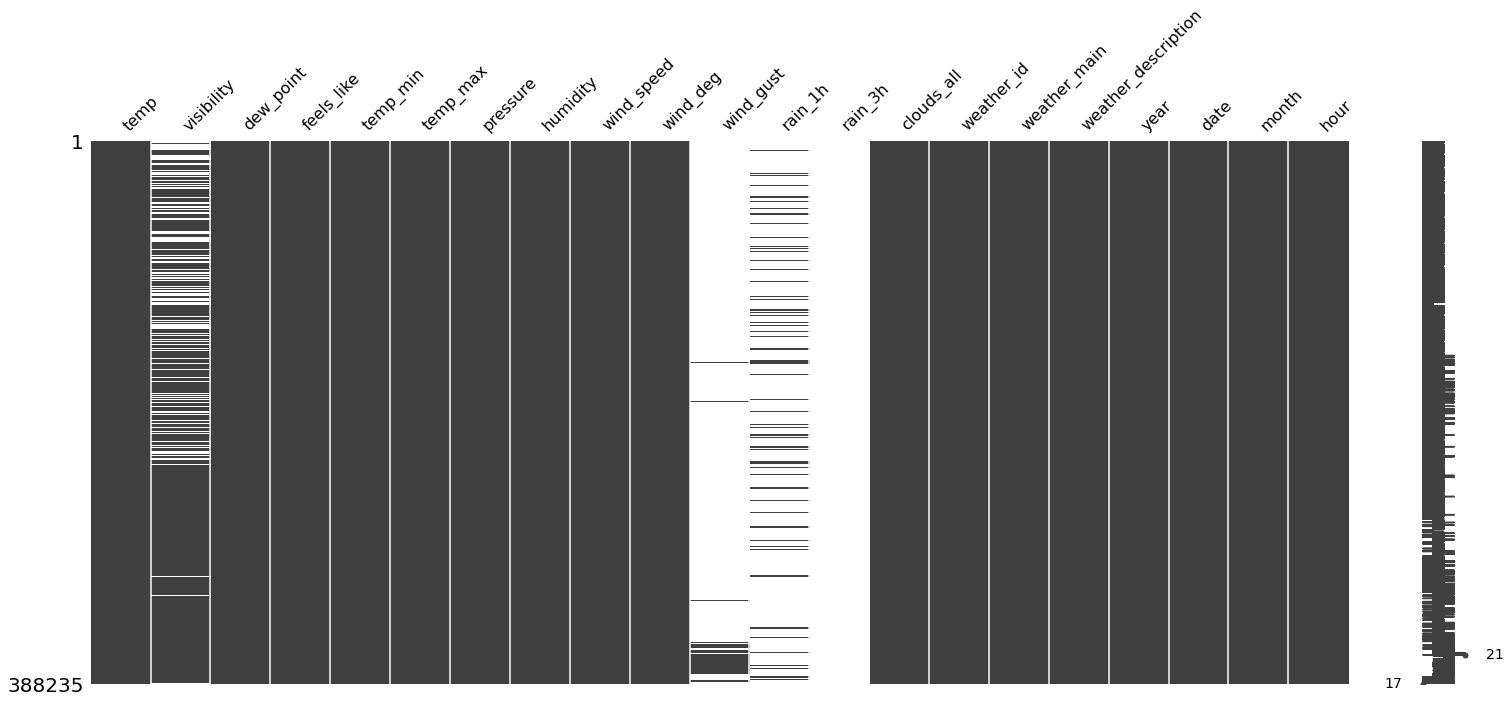

In [44]:
# Program to visualize missing values in dataset
  
# Importing the libraries
import pandas as pd
import missingno as msno
  
# Visualize missing values as a matrix
msno.matrix(df)

In [45]:
df['visibility'].isna().sum()

83079

In [46]:
len(df)

388235

In [47]:
df.drop(['visibility','wind_gust','rain_3h','rain_1h'],axis=1,inplace=True)

In [48]:
df

temp  dew_point  feels_like  temp_min  temp_max  \
dt_iso                                                                        
1979-01-01 00:00:00+00:00  23.70      21.59       24.42     21.04     24.89   
1979-01-01 01:00:00+00:00  23.65      21.54       24.37     21.04     24.87   
1979-01-01 02:00:00+00:00  23.25      20.97       23.90     23.25     23.25   
1979-01-01 03:00:00+00:00  25.63      23.49       26.55     23.04     26.58   
1979-01-01 04:00:00+00:00  25.70      23.56       26.62     23.04     26.51   
...                          ...        ...         ...       ...       ...   
2022-03-22 19:00:00+00:00  28.42      25.85       34.30     27.83     30.01   
2022-03-22 20:00:00+00:00  28.27      26.09       34.23     27.55     30.01   
2022-03-22 21:00:00+00:00  28.18      26.38       34.32     27.55     30.01   
2022-03-22 22:00:00+00:00  28.18      26.38       34.32     27.55     30.01   
2022-03-22 23:00:00+00:00  28.04      26.62       34.24     27.60     29.01   

                           pressure  humidity  wind_speed  wind_deg  \
dt_iso                                                                
1979-01-01 00:00:00+00:00      1014        88        0.50       360   
1979-01-01 01:00:00+00:00      1014        88        0.50       360   
1979-01-01 02:00:00+00:00      1015        87        2.84        28   
1979-01-01 03:00:00+00:00      1016        88        1.00       320   
1979-01-01 04:00:00+00:00      1016        88        1.00       320   
...                             ...       ...         ...       ...   
2022-03-22 19:00:00+00:00      1009        86        2.06       170   
2022-03-22 20:00:00+00:00      1009        88        3.09       170   
2022-03-22 21:00:00+00:00      1008        90        2.57       190   
2022-03-22 22:00:00+00:00      1008        90        1.54       210   
2022-03-22 23:00:00+00:00      1008        92        0.45       200   

                           clouds_all  weather_id weather_main  \
dt_iso                                                           
1979-01-01 00:00:00+00:00          20         721         Haze   
1979-01-01 01:00:00+00:00          20         721         Haze   
1979-01-01 02:00:00+00:00          18         801       Clouds   
1979-01-01 03:00:00+00:00          20         801       Clouds   
1979-01-01 04:00:00+00:00          20         801       Clouds   
...                               ...         ...          ...   
2022-03-22 19:00:00+00:00          40         701         Mist   
2022-03-22 20:00:00+00:00          75         701         Mist   
2022-03-22 21:00:00+00:00          75         701         Mist   
2022-03-22 22:00:00+00:00          75         701         Mist   
2022-03-22 23:00:00+00:00          40         701         Mist   

                          weather_description  year  date  month  hour  
dt_iso                                                                  
1979-01-01 00:00:00+00:00                haze  1979     1      1     0  
1979-01-01 01:00:00+00:00                haze  1979     1      1     1  
1979-01-01 02:00:00+00:00          few clouds  1979     1      1     2  
1979-01-01 03:00:00+00:00          few clouds  1979     1      1     3  
1979-01-01 04:00:00+00:00          few clouds  1979     1      1     4  
...                                       ...   ...   ...    ...   ...  
2022-03-22 19:00:00+00:00                mist  2022    22      3    19  
2022-03-22 20:00:00+00:00                mist  2022    22      3    20  
2022-03-22 21:00:00+00:00                mist  2022    22      3    21  
2022-03-22 22:00:00+00:00                mist  2022    22      3    22  
2022-03-22 23:00:00+00:00                mist  2022    22      3    23  

[388235 rows x 17 columns]

In [49]:
df.columns


Index(['temp', 'dew_point', 'feels_like', 'temp_min', 'temp_max', 'pressure',
       'humidity', 'wind_speed', 'wind_deg', 'clouds_all', 'weather_id',
       'weather_main', 'weather_description', 'year', 'date', 'month', 'hour'],
      dtype='object')

*   Wind-speed to be predicted
      * So, lets see which features are relevant to windspeed first( check correlation).
      * Plot windspeed vs diff (correlated) features

In [50]:
# creation of correlation matrix
corrM = df.corr()
corrM  

temp  dew_point  feels_like  temp_min  temp_max  pressure  \
temp        1.000000   0.041644    0.895410  0.945848  0.929758 -0.633299   
dew_point   0.041644   1.000000    0.388679  0.126664 -0.190014 -0.159318   
feels_like  0.895410   0.388679    1.000000  0.893068  0.740039 -0.609219   
temp_min    0.945848   0.126664    0.893068  1.000000  0.806206 -0.594194   
temp_max    0.929758  -0.190014    0.740039  0.806206  1.000000 -0.572550   
pressure   -0.633299  -0.159318   -0.609219 -0.594194 -0.572550  1.000000   
humidity   -0.623500   0.742628   -0.299886 -0.538454 -0.744682  0.276024   
wind_speed  0.358674  -0.164678    0.277763  0.388173  0.341951 -0.269075   
wind_deg    0.355078   0.005732    0.306689  0.342704  0.318968 -0.374152   
clouds_all  0.049750   0.164028    0.079901  0.097764 -0.036325 -0.217958   
weather_id  0.202783  -0.216036    0.152693  0.210224  0.198065  0.005476   
year        0.071969   0.048552    0.071095  0.025600  0.114875  0.026803   
date        0.006899  -0.007455    0.003344  0.005266  0.007178 -0.005007   
month       0.001048   0.166531    0.005683  0.017975 -0.040006 -0.111007   
hour       -0.164994   0.169798   -0.072688 -0.121248 -0.203062 -0.067889   

            humidity  wind_speed  wind_deg  clouds_all  weather_id      year  \
temp       -0.623500    0.358674  0.355078    0.049750    0.202783  0.071969   
dew_point   0.742628   -0.164678  0.005732    0.164028   -0.216036  0.048552   
feels_like -0.299886    0.277763  0.306689    0.079901    0.152693  0.071095   
temp_min   -0.538454    0.388173  0.342704    0.097764    0.210224  0.025600   
temp_max   -0.744682    0.341951  0.318968   -0.036325    0.198065  0.114875   
pressure    0.276024   -0.269075 -0.374152   -0.217958    0.005476  0.026803   
humidity    1.000000   -0.379459 -0.219921    0.102270   -0.325750 -0.011045   
wind_speed -0.379459    1.000000  0.322428    0.141797    0.107857 -0.136923   
wind_deg   -0.219921    0.322428  1.000000    0.144922    0.035768 -0.071484   
clouds_all  0.102270    0.141797  0.144922    1.000000   -0.185453 -0.099558   
weather_id -0.325750    0.107857  0.035768   -0.185453    1.000000 -0.066370   
year       -0.011045   -0.136923 -0.071484   -0.099558   -0.066370  1.000000   
date       -0.010158    0.005677  0.000060   -0.005159    0.009401 -0.000541   
month       0.139783   -0.031783  0.043299    0.251650   -0.256741 -0.003819   
hour        0.244284   -0.047287 -0.134179    0.000387   -0.046873  0.001215   

                date     month      hour  
temp        0.006899  0.001048 -0.164994  
dew_point  -0.007455  0.166531  0.169798  
feels_like  0.003344  0.005683 -0.072688  
temp_min    0.005266  0.017975 -0.121248  
temp_max    0.007178 -0.040006 -0.203062  
pressure   -0.005007 -0.111007 -0.067889  
humidity   -0.010158  0.139783  0.244284  
wind_speed  0.005677 -0.031783 -0.047287  
wind_deg    0.000060  0.043299 -0.134179  
clouds_all -0.005159  0.251650  0.000387  
weather_id  0.009401 -0.256741 -0.046873  
year       -0.000541 -0.003819  0.001215  
date        1.000000  0.010456  0.000025  
month       0.010456  1.000000  0.002632  
hour        0.000025  0.002632  1.000000

Windspeed has:
* Low Negative correlation with: dt, dew point, year, month, hour
* High Negative correlation with: pressure, humidity
* High Positive correlation with: temp, visibility, feels_like, temp_min, temp_max, wind_deg, wind_gust, rain_3h
* Low Positive correlation with:rain_1h, clouds_all, weather_id
* Negligible correlation with: date, month, year

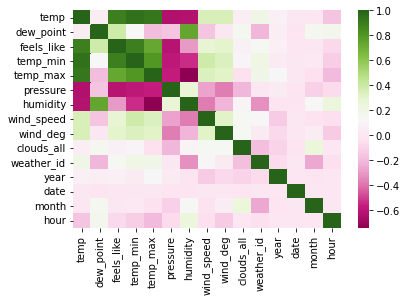

In [51]:
# plotting correlation heatmap
dataplot = sb.heatmap(corrM, cmap="PiYG")

In [52]:
df_1979= df[df.year==1979]

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  15

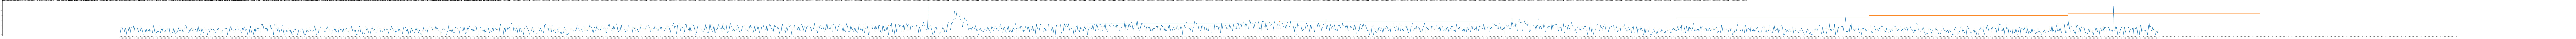

In [55]:
#plot how diff features vary with time
plt.figure(figsize=(700, 10))
plt.plot(df[df.year==1979].wind_speed)
plt.plot(df[df.year==1979].month) #if u dont specify x-axis, the plot is done with index as x-axis 

plt.xticks(fontsize=2, rotation=90)

In [54]:
plt.figure(figsize=(200, 10))
df_month= df[df.month==1]
plt.plot(df_month[df.year==1979].wind_speed)
plt.plot(df_month[df.year==1979].date)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


ValueError: ignored

<Figure size 14400x720 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


Text(0, 0.5, 'Wind Speed')

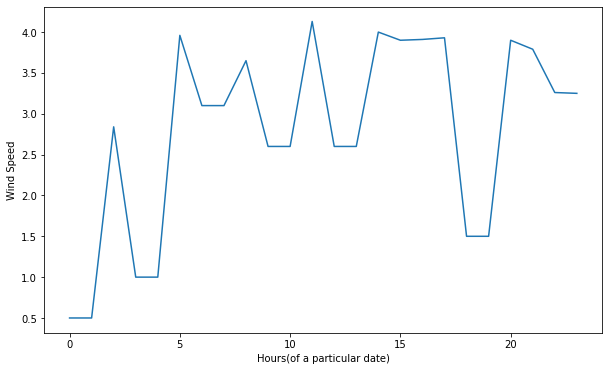

In [ ]:
plt.figure(figsize=(10, 6))
df_date=df[df.date==1]
df_month= df_date[df.month==1]

plt.plot(df_month[df.year==1979].hour,df_month[df.year==1979].wind_speed)

plt.xlabel('Hours(of a particular date)')
plt.ylabel('Wind Speed')

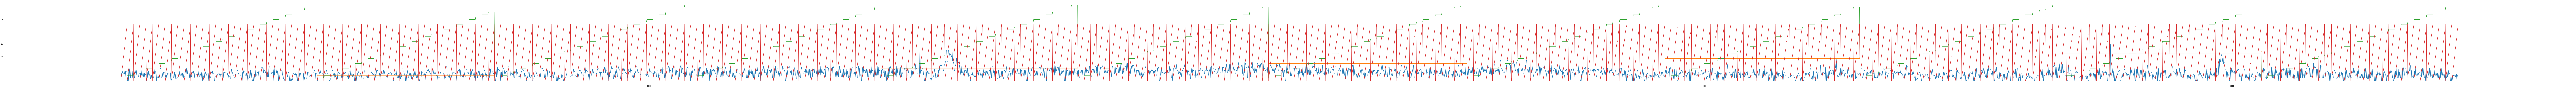

In [ ]:
#plot how diff features vary with time
plt.figure(figsize=(300, 10))
plt.plot(df[df.year==1979].wind_speed)
plt.plot(df[df.year==1979].month)#orange
plt.plot(df[df.year==1979].date) #green
plt.plot(df[df.year==1979].hour) #red

* We see few peaks with low width/standard devaition but a high peak/high value of wind speed- these may refer to 'wind gusts'...note that wind gusts are abrupt/randomly arise and last for only about 20secs...hence it is wise to remove such data points(wind gusts) as they are outlier points
* We see few gradual rises/peaks with high width/std.deviation and a high value of wind speed- these may refer to phenomena like storms which last for a considerable number of hours...hence its imp to take into consideration the textual 'weather_description' (whether a storm is happening ot not etc..)

Proof of the above two points:

weather_main
['Haze' 'Clouds' 'Clear' 'Mist' 'Rain' 'Smoke' 'Drizzle' 'Thunderstorm'
 'Dust' 'Fog' 'Tornado' 'Snow'] 

weather_description
['haze' 'few clouds' 'scattered clouds' 'broken clouds' 'sky is clear'
 'overcast clouds' 'mist' 'light rain' 'smoke' 'moderate rain'
 'light intensity drizzle' 'proximity thunderstorm' 'heavy intensity rain'
 'heavy intensity drizzle' 'light intensity shower rain' 'thunderstorm'
 'thunderstorm with rain' 'drizzle' 'thunderstorm with heavy rain' 'dust'
 'fog' 'heavy intensity shower rain' 'light intensity drizzle rain'
 'rain and drizzle' 'proximity tornado' 'shower rain' 'very heavy rain'
 'sleet' 'thunderstorm with light rain' 'proximity shower rain'
 'light thunderstorm'] 


In [ ]:
df['wind_speed'].max()

44.2

In [ ]:
df[df.wind_speed==44.2]

dt   temp  visibility  dew_point  feels_like  temp_min  \
99793  639057600  29.92     10000.0      23.85       34.84     29.16   
99794  639061200  29.81     10000.0      23.75       34.58     29.20   

       temp_max  pressure  humidity  wind_speed  ...  rain_3h  clouds_all  \
99793     30.97      1006        70        44.2  ...      NaN          20   
99794     30.59      1006        70        44.2  ...      NaN          20   

       weather_id  weather_main  weather_description  weather_icon  year date  \
99793         801        Clouds           few clouds           02d  1990    2   
99794         801        Clouds           few clouds           02n  1990    2   

      month  hour  
99793     4    12  
99794     4    13  

[2 rows x 23 columns]

In [ ]:
df.columns


Index(['dt', 'temp', 'visibility', 'dew_point', 'feels_like', 'temp_min',
       'temp_max', 'pressure', 'humidity', 'wind_speed', 'wind_deg',
       'wind_gust', 'rain_1h', 'rain_3h', 'clouds_all', 'weather_id',
       'weather_main', 'weather_description', 'weather_icon', 'year', 'date',
       'month', 'hour'],
      dtype='object')

In [ ]:
df[df.weather_description=='thunderstorm with rain'][['wind_speed', 'wind_deg',
       'wind_gust', 'rain_1h', 'rain_3h', 'clouds_all', 'weather_id',
       'weather_main', 'weather_description', 'weather_icon', 'year', 'date',
       'month', 'hour']]

wind_speed  wind_deg  wind_gust  rain_1h  rain_3h  clouds_all  \
4148          4.10       230        NaN      NaN      NaN          90   
4149          4.10       230        NaN      NaN      NaN          90   
4604          2.60       230        NaN     0.61      NaN          40   
4606          2.60       230        NaN     0.12      NaN          40   
4831          4.60       230        NaN      NaN      NaN          90   
...            ...       ...        ...      ...      ...         ...   
385377        2.57        40        NaN     0.94      NaN          90   
385426        3.09       320        NaN     0.18      NaN          90   
385451        0.45       145        7.6      NaN      NaN          90   
386221        5.14        70        NaN     0.34      NaN          90   
386225        1.03         0        NaN     0.29      NaN          90   

        weather_id  weather_main     weather_description weather_icon  year  \
4148           201  Thunderstorm  thunderstorm with rain          11n  1979   
4149           201  Thunderstorm  thunderstorm with rain          11n  1979   
4604           201  Thunderstorm  thunderstorm with rain          11n  1979   
4606           201  Thunderstorm  thunderstorm with rain          11n  1979   
4831           201  Thunderstorm  thunderstorm with rain          11n  1979   
...            ...           ...                     ...          ...   ...   
385377         201  Thunderstorm  thunderstorm with rain          11d  2021   
385426         201  Thunderstorm  thunderstorm with rain          11d  2021   
385451         201  Thunderstorm  thunderstorm with rain          11d  2021   
386221         201  Thunderstorm  thunderstorm with rain          11d  2021   
386225         201  Thunderstorm  thunderstorm with rain          11n  2021   

        date  month  hour  
4148      22      6    15  
4149      22      6    16  
4604      11      7    15  
4606      11      7    16  
4831      20      7    21  
...      ...    ...   ...  
385377    27     11     4  
385426    28     11    12  
385451    29     11     6  
386221    30     12    11  
386225    30     12    13  

[2751 rows x 14 columns]

In [ ]:
df[df.wind_speed>=12].weather_description.unique()

array(['light rain', 'moderate rain', 'heavy intensity rain',
       'few clouds', 'sky is clear', 'light intensity shower rain',
       'scattered clouds', 'broken clouds', 'thunderstorm with rain',
       'light intensity drizzle', 'shower rain', 'haze',
       'very heavy rain', 'drizzle'], dtype=object)

In [ ]:
df['wind_speed'].min()

0.0

In [ ]:
df['wind_speed'].mean()

2.628551547379618

In [ ]:
df.describe()

dt           temp     visibility      dew_point  \
count  3.882350e+05  388235.000000  305156.000000  388235.000000   
mean   9.701318e+08      27.928306    6275.484860      22.469745   
std    3.940063e+08       2.488799    2694.820557       2.928157   
min    2.839968e+08      17.920000      49.000000      -3.830000   
25%    6.292494e+08      26.080000    4000.000000      20.820000   
50%    9.715284e+08      27.890000    6000.000000      22.980000   
75%    1.311424e+09      29.620000   10000.000000      24.620000   
max    1.647990e+09      41.630000   10000.000000      31.500000   

          feels_like       temp_min       temp_max       pressure  \
count  388235.000000  388235.000000  388235.000000  388235.000000   
mean       30.620993      27.106848      28.964560    1008.784571   
std         4.179627       2.565094       3.098885       4.147331   
min        17.930000      16.440000      17.920000     908.000000   
25%        26.400000      25.340000      26.700000    1006.000000   
50%        31.050000      27.230000      28.640000    1009.000000   
75%        33.700000      28.900000      30.840000    1012.000000   
max        48.630000      41.590000      44.040000    1069.000000   

            humidity     wind_speed       wind_deg     wind_gust  \
count  388235.000000  388235.000000  388235.000000  24756.000000   
mean       73.930442       2.628552     147.157078      4.099826   
std        14.910428       1.850989     104.729432      3.940122   
min         9.000000       0.000000       0.000000      0.000000   
25%        63.000000       1.340000      50.000000      0.000000   
50%        77.000000       2.600000     155.000000      4.020000   
75%        86.000000       4.100000     230.000000      6.260000   
max       100.000000      44.200000     360.000000     49.400000   

            rain_1h     rain_3h     clouds_all     weather_id           year  \
count  55578.000000  278.000000  388235.000000  388235.000000  388235.000000   
mean       0.866139    4.116547      41.503520     729.537028    2000.238915   
std        1.561315    6.062456      29.444949     138.943519      12.483015   
min        0.100000    0.100000       0.000000     200.000000    1979.000000   
25%        0.190000    0.700000      20.000000     721.000000    1989.000000   
50%        0.400000    2.000000      40.000000     801.000000    2000.000000   
75%        1.000000    5.000000      73.000000     802.000000    2011.000000   
max       49.020000   41.000000     100.000000     804.000000    2022.000000   

                date          month           hour  
count  388235.000000  388235.000000  388235.000000  
mean       15.718274       6.560274      11.530702  
std         8.804619       3.459119       6.928791  
min         1.000000       1.000000       0.000000  
25%         8.000000       4.000000       6.000000  
50%        16.000000       7.000000      12.000000  
75%        23.000000      10.000000      18.000000  
max        31.000000      12.000000      23.000000

In [ ]:
df[df.weather_main=='Tornado'] #effects of tornado last only for couple of hours


dt   temp  visibility  dew_point  feels_like  temp_min  \
103306   651510000  28.60      4000.0      27.72       35.60     27.44   
103307   651513600  28.64      4000.0      27.76       35.64     27.44   
154146   832068000  32.52     10000.0      15.95       32.48     28.98   
238996  1130101200  25.74      4000.0      25.40       26.93     25.44   
238997  1130104800  25.27      4000.0      24.93       26.41     25.11   

        temp_max  pressure  humidity  wind_speed  ...  rain_3h  clouds_all  \
103306     29.05      1008        95         2.1  ...      NaN          20   
103307     29.00      1008        95         2.1  ...      NaN          20   
154146     39.04      1004        37         7.2  ...      NaN           7   
238996     25.97      1008        98         0.0  ...      NaN          40   
238997     25.47      1008        98         0.0  ...      NaN          40   

        weather_id  weather_main  weather_description  weather_icon  year  \
103306         781       Tornado    proximity tornado           50n  1990   
103307         781       Tornado    proximity tornado           50n  1990   
154146         781       Tornado    proximity tornado           50d  1996   
238996         781       Tornado    proximity tornado           50n  2005   
238997         781       Tornado    proximity tornado           50n  2005   

       date month  hour  
103306   24     8    15  
103307   24     8    16  
154146   14     5    10  
238996   23    10    21  
238997   23    10    22  

[5 rows x 23 columns]

* Effects of tornados last only for few hours
* wind_speed during tornado ranges from 2(avg wind speed) to 7.2 ....hence the fact that theres a tornado doesnt really affect windspeed directly

In [ ]:
df[df.weather_description=='proximity thunderstorm']

dt   temp  visibility  dew_point  feels_like  temp_min  \
1506     289418400  26.49      4000.0      23.37       26.49     25.88   
1507     289422000  26.53      4000.0      23.41       26.53     25.94   
3111     295196400  29.11      4000.0      22.11       32.23     28.74   
3113     295200000  29.11      4000.0      22.11       32.23     28.57   
3233     295628400  28.63      4000.0      24.63       33.54     28.31   
...            ...    ...         ...        ...         ...       ...   
374435  1601391600  25.64      4000.0      24.60       26.71     24.04   
374437  1601395200  25.64      4000.0      24.42       26.69     24.01   
374740  1602428400  28.57      4000.0      24.36       33.20     27.84   
375346  1604426400  27.77      4000.0      25.98       33.03     27.45   
375558  1605117600  25.85      4000.0      24.63       26.92     25.44   

        temp_max  pressure  humidity  wind_speed  ...  rain_3h  clouds_all  \
1506       27.06      1015        83         1.5  ...      NaN          20   
1507       27.02      1015        83         1.5  ...      NaN          20   
3111       31.04      1003        66         2.6  ...      NaN          90   
3113       31.04      1003        66         2.6  ...      NaN          90   
3233       29.04      1009        79         1.5  ...      NaN          20   
...          ...       ...       ...         ...  ...      ...         ...   
374435     25.69      1006        94         1.5  ...      NaN          20   
374437     25.69      1006        93         1.5  ...      NaN          20   
374740     29.01      1004        78         1.0  ...      NaN          40   
375346     28.24      1012        90         0.0  ...      NaN          40   
375558     26.04      1012        93         1.0  ...      NaN          75   

        weather_id  weather_main     weather_description  weather_icon  year  \
1506           211  Thunderstorm  proximity thunderstorm           11n  1979   
1507           211  Thunderstorm  proximity thunderstorm           11n  1979   
3111           211  Thunderstorm  proximity thunderstorm           11n  1979   
3113           211  Thunderstorm  proximity thunderstorm           11n  1979   
3233           211  Thunderstorm  proximity thunderstorm           11n  1979   
...            ...           ...                     ...           ...   ...   
374435         211  Thunderstorm  proximity thunderstorm           11n  2020   
374437         211  Thunderstorm  proximity thunderstorm           11n  2020   
374740         211  Thunderstorm  proximity thunderstorm           11n  2020   
375346         211  Thunderstorm  proximity thunderstorm           11n  2020   
375558         211  Thunderstorm  proximity thunderstorm           11n  2020   

       date month  hour  
1506      4     3    18  
1507      4     3    19  
3111     10     5    15  
3113     10     5    16  
3233     15     5    15  
...     ...   ...   ...  
374435   29     9    15  
374437   29     9    16  
374740   11    10    15  
375346    3    11    18  
375558   11    11    18  

[3917 rows x 23 columns]

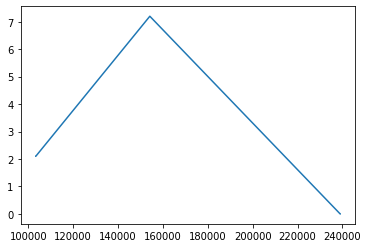

In [ ]:
plt.plot(df[df.weather_main=='Tornado'].wind_speed)

In [ ]:
df[df.wind_gust=!'']

In [ ]:
# calculate avg windspeed per day

In [ ]:
# plot this avg wind speed with time (to see how actually windspeed varies w time on an average)

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
df_purely_numeric= df.select_dtypes(include=np.number)

In [ ]:
clusters = 10
 
kmeans = KMeans(n_clusters = clusters)
kmeans.fit(df_purely_numeric)
 
print(kmeans.labels_)

[8 8 9 ... 8 8 8]


In [ ]:
from sklearn.decomposition import PCA
 
pca = PCA(3)
pca.fit(df_purely_numeric)
 
pca_data = pd.DataFrame(pca.transform(df_purely_numeric))
 
print(pca_data.head())

           0           1          2
0  -4.965470  211.093509 -29.867444
1  -4.962474  211.083602 -29.863472
2 -64.462784 -124.591040 -13.343221
3 -82.259447  166.418382 -24.525933
4 -82.256731  166.410494 -24.518619


In [ ]:
from matplotlib import colors as mcolors
import math
  
''' Generating different colors in ascending order
                                of their hsv values '''
colors = list(zip(*sorted((
                    tuple(mcolors.rgb_to_hsv(
                          mcolors.to_rgba(color)[:3])), name)
                     for name, color in dict(
                            mcolors.BASE_COLORS, **mcolors.CSS4_COLORS
                                                      ).items())))[1]
  
  
# number of steps to taken generate n(clusters) colors
skips = math.floor(len(colors[5 : -5])/clusters)
cluster_colors = colors[5 : -5 : skips]

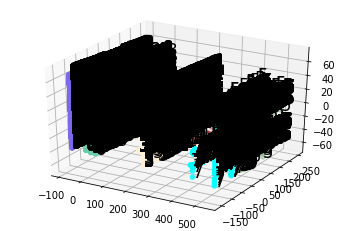

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
  
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(pca_data[0], pca_data[1], pca_data[2],
           c = list(map(lambda label : cluster_colors[label],
                                            kmeans.labels_)))
  
str_labels = list(map(lambda label:'% s' % label, kmeans.labels_))
  
list(map(lambda data1, data2, data3, str_label:
        ax.text(data1, data2, data3, s = str_label, size = 16.5,
        zorder = 20, color = 'k'), pca_data[0], pca_data[1],
        pca_data[2], str_labels))
  
plt.show()

#LSTM

#ARIMA